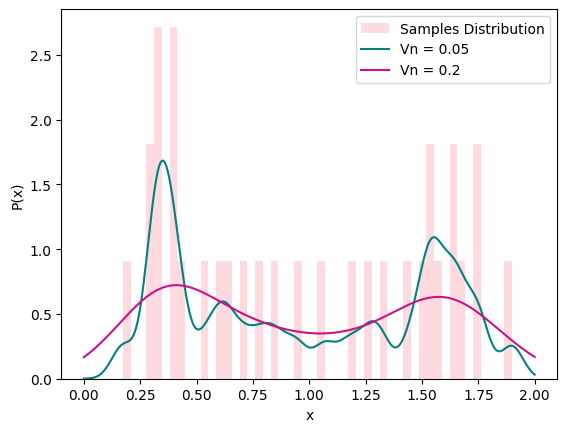

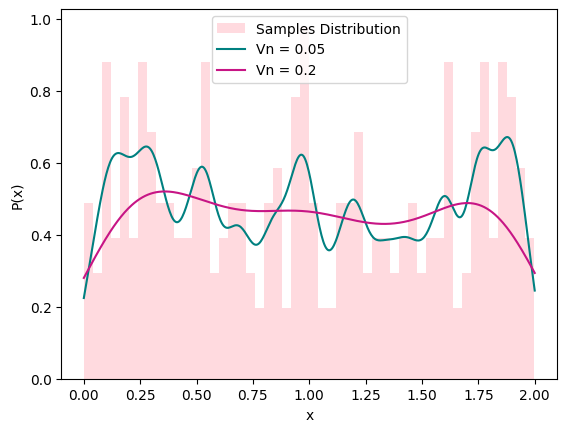

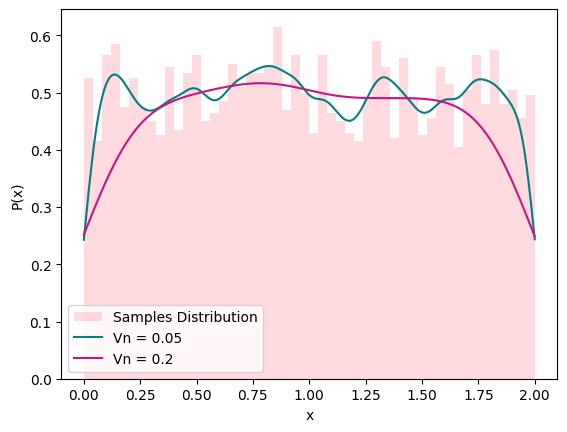

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Vn1 = h1 = 0.05
Vn2 = h2 = 0.2
x = np.linspace(0, 2, 500)

def estimate_parzen_window(N):
    train_data = np.random.uniform(0, 2, N)
    n = len(train_data)
    estimation1, estimation2 = calculate_parzen_window(x, train_data, n)
    plot_estimations(x, train_data, estimation1, estimation2)

def normal_kernel(x):
    return 1/np.sqrt(2 * np.pi) * np.exp(-0.5 * x**2)

def calculate_parzen_window(x, train_data, n):
    estimation1 = np.zeros_like(x)
    estimation2 = np.zeros_like(x)
    for i in range(n):
        estimation1 += normal_kernel((x - train_data[i]) / h1)
        estimation2 += normal_kernel((x - train_data[i]) / h2)
    estimation1 /= (Vn1 * n)
    estimation2 /= (Vn2 * n)
    return estimation1, estimation2


def plot_estimations(x, train_data, estimation1, estimation2):
    plt.hist(train_data, bins=50, density=True, alpha=0.5, label="Samples Distribution", color='lightpink')
    plt.plot(x, estimation1, label='Vn = 0.05', color= 'teal')
    plt.plot(x, estimation2, label='Vn = 0.2', color= 'mediumvioletred')
    plt.xlabel('x')
    plt.ylabel('P(x)')
    plt.legend()
    plt.show()

estimate_parzen_window(32)
estimate_parzen_window(256)
estimate_parzen_window(5000)